In [1]:
####### os, pickle
import os
import pickle

from collections import Counter
from imblearn.over_sampling import SMOTE 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay

os.chdir('../')
from funciones import* 
from main import *


X_cat: (54849, 6365) y_cat: (54849,)
X: (54849, 10114) y: (54849, 1)


In [2]:
#X_balanceado.head()
X_cat.head()

,Rubro1_Artículos de electrónica,Rubro1_Artículos de fabricación y producción,Rubro1_Artículos eléctricos y de iluminación,"Rubro1_Artículos para estructuras, obras y construcciones",Rubro1_Artículos para plantas y animales,"Rubro1_Combustibles, lubricantes y anticorrosivos",Rubro1_Consultoria,"Rubro1_Educación, formación, entrenamiento y capacitación","Rubro1_Equipamiento para el acondicionamiento, distribución y filtrado de fluidos",Rubro1_Equipamiento para laboratorios,...,nombre_producto_Ángulos de plástico,nombre_producto_Árbol de medios,nombre_producto_Árboles,nombre_producto_Árnica,nombre_producto_Émbolo buzo de desagüe o inodoro,nombre_producto_Éter,nombre_producto_Órtesis ortopédicas espinales,nombre_producto_Óxido de calcio,nombre_producto_Útiles de colocación de compuestos,nombre_producto_Útiles de colocación de hidróxido de calcio
id_producto,,,,,,,,,,,,,,,,,,,,,
2792-88-LE21-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1704-52-LP21-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003-20-L121-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4236-21-L121-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4236-21-L121-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
Counter(y_cat)
#Counter(y_balanceado_redux)

Counter({0: 4525, 1: 586})

## Entrenamiento con variables categoricas Mercado Publico (sólo dummies)

In [19]:

X_train, X_test, y_train, y_test = train_test_split(
    X_cat, y_cat, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y


In [23]:
clf = LogisticRegression(
    solver='lbfgs', 
    penalty='l2',
    multi_class='ovr',
    max_iter=500,
    C= 0.1,
    n_jobs=-1,
    verbose=1) # la forma del GD
clf = clf.fit(X_train_smote, y_train_smote)
Y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   31.8s finished


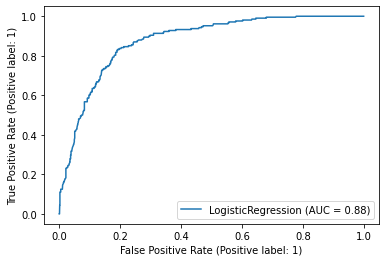

Train AUC 0.9259745628754164
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      3046
           1       0.87      0.07      0.13       378

    accuracy                           0.90      3424
   macro avg       0.88      0.54      0.54      3424
weighted avg       0.89      0.90      0.86      3424



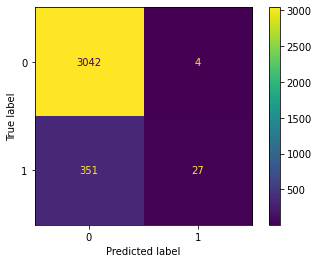

Test AUC 0.8772673193946013
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1479
           1       0.87      0.10      0.17       208

    accuracy                           0.89      1687
   macro avg       0.88      0.55      0.56      1687
weighted avg       0.88      0.89      0.84      1687



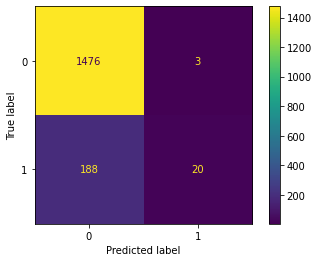

In [24]:
x07 = metrics(clf, X_train, X_test, y_train, y_test, thr=0.5)
x07

In [46]:
os.chdir(r'Modelos')
#os.chdir(r'C:\Users\metal\Trabajos Bootcamp\Proyecto Final\juanito_v2.0\Modelos')

In [47]:
fh = open('m_reglog_cat.pkl','wb')
#fh = open('df_smote30_train_test(redux).pkl','wb')
pickle.dump(clf,fh)
fh.close()

## Ahora entrenamos el modelo con variables creadas a partir del campo DESCRIPCION y solo variable categorica Rubro 1

In [3]:
### ojo que cambió la X ahora tiene solo categorías filtras por CatBoosting
X.shape

(51646, 10055)

In [4]:
y.shape

(51646,)

In [5]:
logreg = LogisticRegression()
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
''' parametros definidos anteriormente   
    solver='lbfgs', 
    penalty='l2',
    multi_class='ovr',
    max_iter=500,
    C= 0.1,
    n_jobs=-1,
    verbose=1'''

params = {
    'C': [1.00,0.05], #valores que tomará la Inverse of regularization strength [1.00,0.05,0.01]
    #'class_weight': None,
    #'dual': False,
    #'fit_intercept': True,
    #'intercept_scaling': 1,
    #'l1_ratio': None,
    'max_iter': [500], #Maximum number of iterations taken for the solvers to converge.
    'multi_class': ['ovr'], #‘ovr’, then a binary problem is fit for each label
    #'n_jobs': None,  # lo definiremos en el gridsearch
    'penalty': ['l2']
    #'random_state': None, # lo aplicaremos en el gridsearch
    #'solver': 'lbfgs',  # usamos el que viene por default, ‘liblinear’ is limited to one-versus-rest schemes
    #'tol': 0.0001, #dejamos por defecto el criterio de tolerancia para detener la iteracion
    #'verbose': 0 #dejamos valor por defecto
    #'warm_start': False
    }


In [26]:
scoring = ['roc_auc']
grid_solver = GridSearchCV(estimator = logreg, # model to train
                   param_grid = params,
                   scoring = scoring,
                   cv = 3,  #aplica cross validation utilizando un stratified KFold
                   n_jobs=-1,
                   refit = 'roc_auc',
                   verbose = 2)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y


In [27]:
model_result_logreg = grid_solver.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [28]:
model_result_logreg.best_params_

{'C': 1.0, 'max_iter': 500, 'multi_class': 'ovr', 'penalty': 'l2'}

In [29]:
model_result_logreg.cv_results_

{'mean_fit_time': array([144.08115506, 164.2935257 ]),
 'std_fit_time': array([31.58270605,  6.53674108]),
 'mean_score_time': array([7.5431246 , 8.76940028]),
 'std_score_time': array([1.62943634, 1.18339523]),
 'param_C': masked_array(data=[1.0, 0.05],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[500, 500],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_multi_class': masked_array(data=['ovr', 'ovr'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l2'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1.0, 'max_iter': 500, 'multi_class': 'ovr', 'penalty': 'l2'},
  {'C': 0.05, 'max_iter': 500, 'multi_class': 'ovr', 'penalty': 'l2'}],
 'split0_test_roc_auc': array([0.9810059 , 0.96574493]),
 'split1_test_roc_auc': array([0.

In [32]:
os.chdir(r'Modelos')
#os.chdir(r'C:\Users\metal\Trabajos Bootcamp\Proyecto Final\juanito_v2.0\Modelos')
fh = open('m_reglog_PCA','wb')
#fh = open('df_smote30_train_test(redux).pkl','wb')
pickle.dump(model_result_logreg,fh)
fh.close()

In [33]:
results_cv=model_result_logreg.cv_results_
results=pd.DataFrame(results_cv)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_multi_class,param_penalty,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,144.081155,31.582706,7.543125,1.629436,1.0,500,ovr,l2,"{'C': 1.0, 'max_iter': 500, 'multi_class': 'ov...",0.981006,0.984968,0.985702,0.983892,0.002062,1
1,164.293526,6.536741,8.769400,1.183395,0.05,500,ovr,l2,"{'C': 0.05, 'max_iter': 500, 'multi_class': 'o...",0.965745,0.965520,0.968009,0.966425,0.001124,2


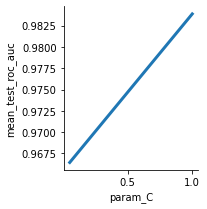

In [34]:
sns.relplot(x="param_C",
            y="mean_test_roc_auc",
            #style="param_max_features",
            #hue="param_min_impurity_decrease",
            kind = "line",
            palette=["r", "b"],
            height=3, linewidth=3, data=results)


In [38]:
type(model_result_logreg.best_estimator_)

sklearn.linear_model._logistic.LogisticRegression

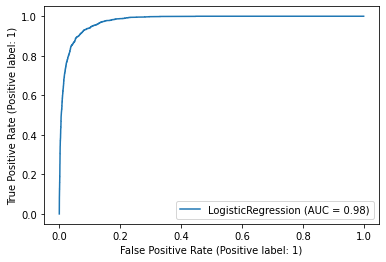

Train AUC 0.9892381270593935
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     31010
           1       0.91      0.90      0.91      9303

    accuracy                           0.96     40313
   macro avg       0.94      0.94      0.94     40313
weighted avg       0.96      0.96      0.96     40313



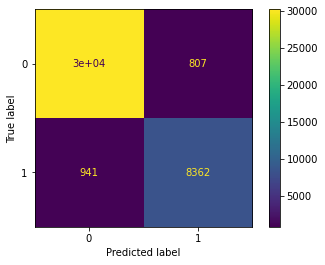

Test AUC 0.9773810380901445
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     15260
           1       0.76      0.80      0.78      1784

    accuracy                           0.95     17044
   macro avg       0.87      0.88      0.88     17044
weighted avg       0.95      0.95      0.95     17044



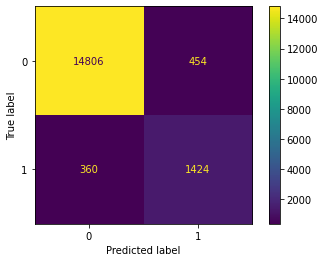

In [39]:
metrics(model_result_logreg.best_estimator_, X_train_smote, X_test, y_train_smote, y_test, thr=0.5)

### Entrenamiento modelo con variables categoricas filtradas por Catboost y con descomposición del campo descripción en PCA del vector de palabras (bag of words)

In [3]:
X.index = X['id_producto']
X.drop(columns=['id_producto'], inplace=True)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y


In [10]:
#X_train_smote = np.array(X_train_smote)
#y_train_smote = np.array(y_train_smote)
y_train_smote

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [5]:
logreg = LogisticRegression(
    solver='lbfgs',
    C=1.00, #valores que tomará la Inverse of regularization strength [1.00,0.05,0.01]
    max_iter=500, #Maximum number of iterations taken for the solvers to converge.
    multi_class= 'ovr', #‘ovr’, then a binary problem is fit for each label
    penalty='l2',
    verbose=1)

In [8]:
model = logreg.fit(X_train_smote,y_train_smote)

C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.5s finished


C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


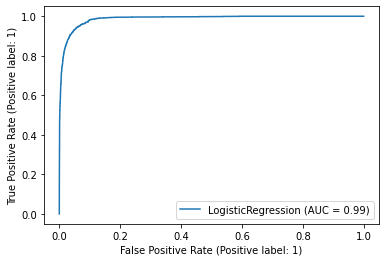

Train AUC 0.9942894519935022
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     32751
           1       0.94      0.93      0.93      9825

    accuracy                           0.97     42576
   macro avg       0.96      0.96      0.96     42576
weighted avg       0.97      0.97      0.97     42576



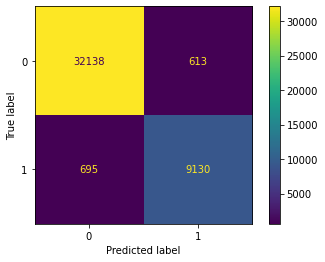

C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Test AUC 0.9870316488255384
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16123
           1       0.82      0.86      0.84      1978

    accuracy                           0.96     18101
   macro avg       0.90      0.92      0.91     18101
weighted avg       0.96      0.96      0.96     18101



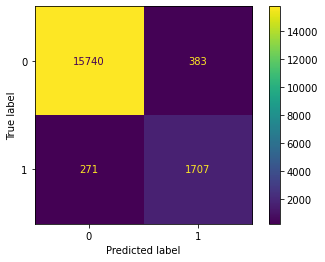

In [9]:
metrics(model, X_train_smote, X_test, y_train_smote, y_test, thr=0.5)

In [ ]:
fh = open('m_reglog_PCA_v2','wb')
#fh = open('df_smote30_train_test(redux).pkl','wb')
pickle.dump(model,fh)
fh.close()

## Analizamos los errores

In [2]:
os.chdir('../Modelos')
fh2=open('m_reglog_PCA_v2.pkl','rb')
model=pickle.load(fh2)
fh2.close()


c:\Users\diana\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [3]:
X.index = X['id_producto']
X.drop(columns=['id_producto'], inplace=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y

In [5]:
y_predict= pd.DataFrame(model.predict(X_test))
y_predict.rename(columns={0:'y_predict'},inplace=True)
y_predict.index = y_test.index
y_predict

In [6]:
dferror=pd.merge(df, y_test, left_index=True, right_index=True)

In [7]:
#dferror.drop(['label_x'], axis=1, inplace=True)

In [52]:
dferror =pd.concat([dferror, y_predict[0]], axis=1)
dferror.rename(columns={0:'predic'},
               inplace=True)
dferror

,id_producto,Descripcion raiz limpia,label_y,predic
0,1704-52-LP21-1,servici mudanz enser propi hospital martin qui...,0,0
1,4236-21-L121-2,plom,0,0
2,4236-21-L121-4,escobillon ase municipal,0,0
3,4236-21-L121-9,caj lapiz carpinter,0,0
4,3021-77-L121-22,carpet plastific accoclip archiv ofici,0,0
...,...,...,...,...
18096,2669-309-L121-4,fluticason propionat inhal bucal fluticason pr...,0,0
18097,2669-309-L121-5,pregabalin caj comprim,0,0
18098,3287-49-L121-1,empan beb activ deport recreat,0,0
18099,3383-11-LE21-27,suer fisiolog clorur sodi matraz,0,0


In [80]:
data

,id_licitacion,id_producto,Rubro1,Rubro2,Rubro3,nombre_producto,descripcion,label
id_producto,,,,,,,,
2792-88-LE21-1,2792-88-LE21,2792-88-LE21-1,Equipamiento y suministros médicos,Productos quirúrgicos,"Equipo quirúrgico, accesorios y productos rela...",Equipo quirúrgico de fragmatome retinal vítreo...,CÁMARA RETINAL NO MIDRIÁTICA - ESPECIFICACIONE...,0
1704-52-LP21-1,1704-52-LP21,1704-52-LP21-1,"Servicios de transporte, almacenaje y correo",Transporte de correo y carga,Transporte de carga por carretera,Servicios de transporte local en camión,SERVICIO DE MUDANZA DE ENSERES PROPIOS Y EN US...,0
1003-20-L121-1,1003-20-L121,1003-20-L121-1,"Productos derivados de minerales, plantas y an...",Chatarra y desechos no metálicos,Desechos no metálicos,Desperdicios o restos de madera,LEÑA SECA CERTIFICADA,0
4236-21-L121-1,4236-21-L121,4236-21-L121-1,"Equipos, accesorios y suministros de oficina",Suministros de oficina,Instrumentos de escritura,Marcadores,MARCADOR BLANCO PARA METALES,0
4236-21-L121-2,4236-21-L121,4236-21-L121-2,Herramientas y maquinaria en general,Herramientas manuales,Herramientas de medición y trazado,Péndulos,PLOMADA,0
...,...,...,...,...,...,...,...,...
1058141-35-LQ21-1,1058141-35-LQ21,1058141-35-LQ21-1,Medicamentos y productos farmacéuticos,Medicamentos hematólicos,Trombolíticos,Alteplasa,ALTEPLASA FA 50 MG CAJA X 2 FA [216P008],0
1058141-35-LQ21-4,1058141-35-LQ21,1058141-35-LQ21-4,Medicamentos y productos farmacéuticos,Medicamentos hematólicos,Trombolíticos,Tenecteplasa,TENECTEPLASA FA 10.000 UI (50 MG) [216P185],0
1173455-12-LE21-41,1173455-12-LE21,1173455-12-LE21-41,Artículos de fabricación y producción,Artículos de ferretería,Cerrojos,Grapas de ferretería,manguera transparente para nivel (mts),0
